In [18]:
import pandas as pd
     

df = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\indieelevate\\data.csv') # считываем файл csv

df.columns # смотрим какие колонки у нас в dataset
df.isnull().sum() # ищем знаачения null & NaN

duplicates = df.duplicated() # ищем дубликаты, путем проверки каждой строки и создания объекта типа Series содержащего булиевые значения
duplicate_rows = df[duplicates] # создаем объект типа DataFrame и помещаем туда все дубликаты 
duplicate_rows

df[df['Age'].isnull()] # выводим все строки с NaN & null
missing_percentage = df['Age'].isnull().mean() * 100 # высчитвыаем процент пропущенных значений
print(f"Пропущенные значения возраста: {missing_percentage:.2f}%") # форматируем строку, вставляя значение missing_percentage с двумя знаками после запятой

missing_age = df['Age'].isnull()
contingency_table = pd.crosstab(missing_age, df['Ответ на вопрос']) # создаем таблицу сопряженности, которая позволяет увидеть взаимосвязь между возрастом и ответами на вопрос
print(contingency_table)

Пропущенные значения возраста: 13.54%
Ответ на вопрос   да  да, но очень плохо описано  неверное решение  нет
Age                                                                    
False            121                           5                 4  151
True              14                           1                 0   29


In [17]:
from scipy.stats import chi2_contingency

data = {
    'да': [121, 14],
    'да, но очень плохо описано': [5, 1],
    'неверное решение': [4, 0],
    'нет': [151, 29]
}
contingency_table = pd.DataFrame(data, index=['Age_present', 'Age_missing'])

# Выполнение теста хи-квадрат, который используется для определения того, существуют ли значительные различия между категориальными переменными или проверки гипотезы о независимости между двумя категориальными переменными
chi2, p, dof, ex = chi2_contingency(contingency_table)
# * chi2: Статистика хи-квадрат, которая является мерой различия между наблюдаемыми и ожидаемыми данными.
# * p: Значение p, которое представляет вероятность того, что наблюдаемые различия произошли случайно.
# * dof: Количество степеней свободы, которое определяется количеством категорий в каждой переменной минус 1.
# * ex: Таблица ожидаемых значений.

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
  print('Есть статистически значимая связь между отсутствием возраста и типом ответа')
else:
  print('Связи нет, и пропуски возраста можно считать случайными относительно типа ответа')

Chi2 Statistic: 2.8517866985393683
P-value: 0.4150457026643172
Связи нет, и пропуски возраста можно считать случайными относительно типа ответа


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Так как отсутствующие данные в столбце "Age" занимают весомую часть, поэтому заменяем пропуски медианным значением
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print("Пропущенные значения возраста заполнены медианой.")

# смотрим ответы по всем категориям
response_counts = df['Ответ на вопрос'].value_counts()
# print("Количество ответов по категориям:")
# response_counts

# с помощью lambda функции мы перебираем список yes_responses и сверяем его с ответами в колонке 'Ответ на вопрос', в случае если значение присутствует в списке, присваиваем ему значаение 'Да' иначе 'Нет'
yes_responses = ['да', 'да, но очень плохо описано', 'неверное решение']
df['Ответ на вопрос'] = df['Ответ на вопрос'].apply(
    lambda x: 'Да' if x.lower() in yes_responses else 'Нет'
)

response_counts = df['Ответ на вопрос'].value_counts()
print("Количество ответов по категориям:")
response_counts

Пропущенные значения возраста заполнены медианой.
Количество ответов по категориям:


Ответ на вопрос
Нет    147
Да     129
Name: count, dtype: int64

In [15]:
# для выявления выбросов применяем метод межквартильного размаха
import numpy as np
from scipy import stats
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
# нижняя граница выбросов рассчитывается как Q1 минус 1,5 раза IQR.
# верхняя граница выбросов рассчитывается как Q3 плюс 1,5 раза IQR.
print(f"Нижняя граница: {lower}")
print(f"Верхняя граница: {upper}")

outliers_iqr = df[(df['Age'] < lower) | (df['Age'] > upper)]
print(f"Количество выбросов по методу IQR: {outliers_iqr.shape[0]}")

Нижняя граница: 9.0
Верхняя граница: 41.0
Количество выбросов по методу IQR: 12


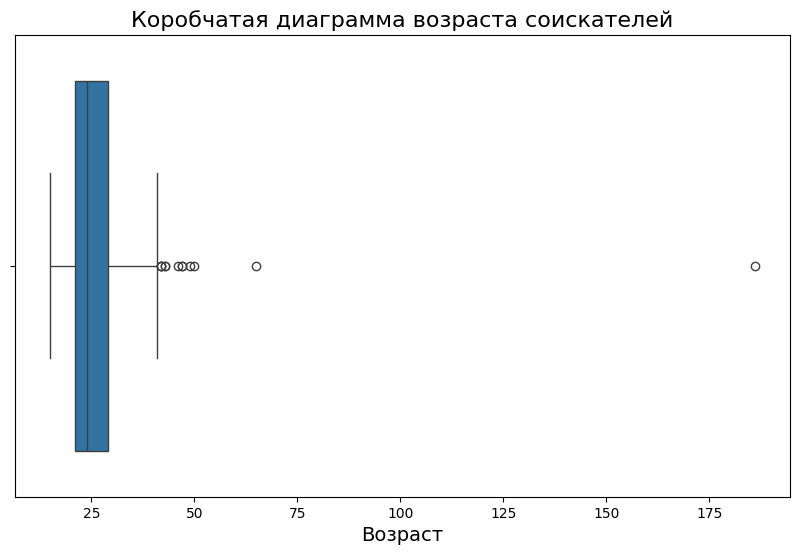

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Коробчатая диаграмма возраста соискателей', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.show()

In [19]:
# Удаляем аномальные выбросы

min_age = 16
max_age = 65

df_filtered = df[(df['Age'] >= min_age) & (df['Age'] < max_age)]
print(f"Количество строк после фильтрации по возрасту: {df_filtered.shape[0]} из {df.shape[0]}")
df = df_filtered.reset_index(drop=True)

Количество строк после фильтрации по возрасту: 276 из 325


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Так как отсутствующие данные в столбце "Age" занимают весомую часть, поэтому заменяем пропуски медианным значением
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print("Пропущенные значения возраста заполнены медианой.")

# смотрим ответы по всем категориям
response_counts = df['Ответ на вопрос'].value_counts()
# print("Количество ответов по категориям:")
# response_counts

# с помощью lambda функции мы перебираем список yes_responses и сверяем его с ответами в колонке 'Ответ на вопрос', в случае если значение присутствует в списке, присваиваем ему значаение 'Да' иначе 'Нет'
yes_responses = ['да', 'да, но очень плохо описано', 'неверное решение']
df['Ответ на вопрос'] = df['Ответ на вопрос'].apply(
    lambda x: 'Да' if x.lower() in yes_responses else 'Нет'
)

df_sorted = df.sort_values(by='Age')
df_sorted

Пропущенные значения возраста заполнены медианой.


,applicant_name,Age,Ответ на вопрос
245,name_291,17.0,Нет
209,name_247,17.0,Нет
173,name_205,17.0,Нет
195,name_231,17.0,Нет
84,name_93,18.0,Нет
...,...,...,...
121,name_141,46.0,Нет
234,name_277,47.0,Нет
36,name_40,47.0,Нет
0,name_0,49.0,Нет


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Так как отсутствующие данные в столбце "Age" занимают весомую часть, поэтому заменяем пропуски медианным значением
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print("Пропущенные значения возраста заполнены медианой.")

# смотрим ответы по всем категориям
response_counts = df['Ответ на вопрос'].value_counts()
# print("Количество ответов по категориям:")
# response_counts

# с помощью lambda функции мы перебираем список yes_responses и сверяем его с ответами в колонке 'Ответ на вопрос', в случае если значение присутствует в списке, присваиваем ему значаение 'Да' иначе 'Нет'
yes_responses = ['да', 'да, но очень плохо описано', 'неверное решение']
df['Ответ на вопрос'] = df['Ответ на вопрос'].apply(
    lambda x: 'Да' if x.lower() in yes_responses else 'Нет'
)

age_stats = df.groupby('Ответ на вопрос')['Age'].describe()
age_stats

Пропущенные значения возраста заполнены медианой.


,count,mean,std,min,25%,50%,75%,max
Ответ на вопрос,,,,,,,,
Да,129.0,27.387597,6.475085,18.0,22.0,26.0,31.0,43.0
Нет,147.0,25.183673,7.070119,17.0,20.5,22.0,29.5,50.0


In [30]:
# Проверяем группы на наличия нормального распределения
from scipy.stats import shapiro

age_yes = df[df['Ответ на вопрос'] == 'Да']['Age']
age_no = df[df['Ответ на вопрос'] == 'Нет']['Age']

stat_shapiro_yes, p_shapiro_yes = stats.shapiro(age_yes)
print(f"Шапиро-Уик Тест для категории 'Да': Statistics={stat_shapiro_yes:.4f}, p-value={p_shapiro_yes:.4f}")

stat_shapiro_no, p_shapiro_no = stats.shapiro(age_no)
print(f"Шапиро-Уик Тест для категории 'Нет': Statistics={stat_shapiro_no:.4f}, p-value={p_shapiro_no:.4f}")

if p_shapiro_yes < 0.05:
  print('распределение не нормальное')
else:
  print('распределение нормальное')

Шапиро-Уик Тест для категории 'Да': Statistics=0.9313, p-value=0.0000
Шапиро-Уик Тест для категории 'Нет': Statistics=0.8487, p-value=0.0000
распределение не нормальное


In [34]:
# Так как у обеих групп не нормальное распределение для выявления влияния возраста соискателей на выполнение задачи в сопроводительном письме используем тест Манна-Уитни
from scipy.stats import mannwhitneyu

u_stat, p_value_mw = mannwhitneyu(age_yes, age_no, alternative='two-sided')
print(f"Тест Манна-Уитни: U-Statistic={u_stat}, P-Value={p_value_mw:.4f}")
# * alternative='two-sided' — параметр, указывающий, что проверяется двусторонняя гипотеза (т. е. медианы в двух группах могут отличаться в любом направлении).
if p_value_mw > 0.05:
  print('Возраст соискателей НЕ влияет на выполнение тестового задания')
else:
  print('Возраст соискателей влияет на выполнение тестового задания')

# Тест Манна-Уитни используется для проверки того, существуют ли различия между двумя независимыми выборками, когда данные не имеют нормального распределения или когда размер выборки меньше 30. Он сравнивает медианы двух групп.

Тест Манна-Уитни: U-Statistic=11900.0, P-Value=0.0002
Возраст соискателей влияет на выполнение тестового задания


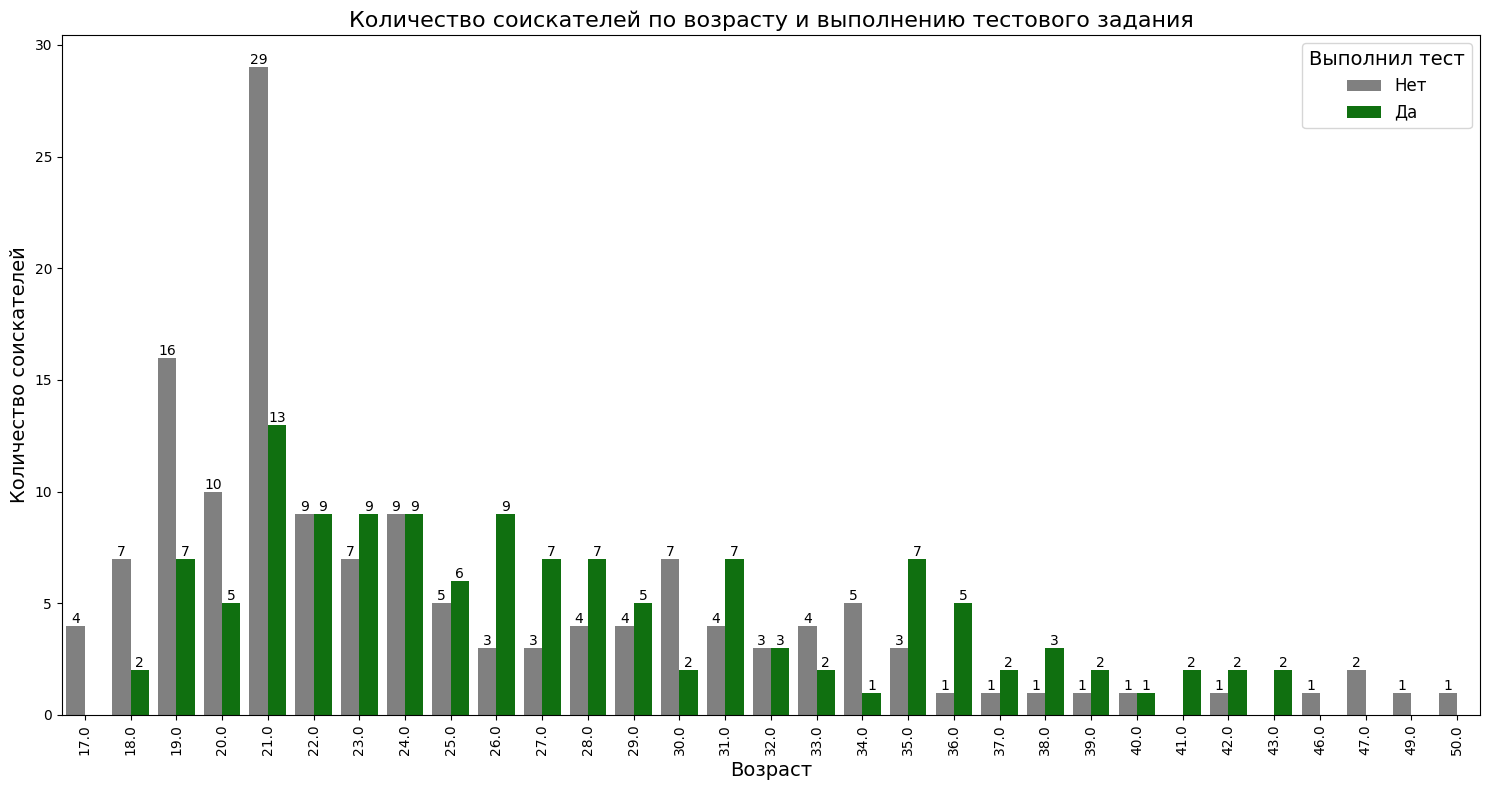

In [35]:
age_response_counts = df.groupby(['Age', 'Ответ на вопрос']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))

sns.barplot(
    data=age_response_counts,
    x='Age',
    y='Count',
    hue='Ответ на вопрос',
    palette={'Да': 'green', 'Нет': 'grey'},
    order=sorted(df['Age'].unique())
)

plt.title('Количество соискателей по возрасту и выполнению тестового задания', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество соискателей', fontsize=14)
plt.legend(title='Выполнил тест', title_fontsize=14, fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()